In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
#----------SKLEARN--------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score


#-------NLTK--------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#-------TENSORFLOW---------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , GRU, Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [ ]:
book_rating = pd.read_csv('/content/drive/MyDrive/Books_rating.csv')
book_rating

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [ ]:
book_rating.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [ ]:
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [ ]:
book_rating.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [ ]:
book_rating['review/text']

0          This is only for Julie Strain fans. It's a col...
1          I don't care much for Dr. Seuss but after read...
2          If people become the books they read and if "t...
3          Theodore Seuss Geisel (1904-1991), aka &quot;D...
4          Philip Nel - Dr. Seuss: American IconThis is b...
                                 ...                        
2999995    This is an extremely difficult book to digest,...
2999996    This is pretty interesting. Collingwood seems ...
2999997    This is a good book but very esoteric. "What i...
2999998    My daughter, a freshman at Indiana University,...
2999999    The guy has a few good ideas but, reader, bewa...
Name: review/text, Length: 3000000, dtype: object

In [ ]:
book_rating['review/summary']

0                     Nice collection of Julie Strain images
1                                          Really Enjoyed It
2            Essential for every personal and Public Library
3            Phlip Nel gives silly Seuss a serious treatment
4                                     Good academic overview
                                 ...                        
2999995                                            Difficult
2999996        Quite good and ahead of its time occasionally
2999997    Easier reads of those not well versed in histo...
2999998     Yes, it is cheaper than the University Bookstore
2999999    Collingwood's ideas sink in a quagmire or verb...
Name: review/summary, Length: 3000000, dtype: object

In [ ]:
book_rating['review/score']

0          4.0
1          5.0
2          5.0
3          4.0
4          4.0
          ... 
2999995    4.0
2999996    4.0
2999997    4.0
2999998    5.0
2999999    1.0
Name: review/score, Length: 3000000, dtype: float64

In [ ]:
book_rating1 = book_rating[[ 'Title','review/score', 'review/summary', 'review/text']]
book_rating1

,Title,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...
2999995,The Idea of History,4.0,Difficult,"This is an extremely difficult book to digest,..."
2999996,The Idea of History,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,The Idea of History,4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,The Idea of History,5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [ ]:
book_rating1 = book_rating1.dropna()
book_rating1

,Title,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...
2999995,The Idea of History,4.0,Difficult,"This is an extremely difficult book to digest,..."
2999996,The Idea of History,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,The Idea of History,4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,The Idea of History,5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [ ]:
book_rating1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999377 entries, 0 to 2999999
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   review/score    float64
 2   review/summary  object 
 3   review/text     object 
dtypes: float64(1), object(3)
memory usage: 114.4+ MB


In [ ]:
book_rating1.isna().sum()

Title             0
review/score      0
review/summary    0
review/text       0
dtype: int64

In [ ]:
book_rating1.columns = ['Title', 'Review_Rating', 'Review_Summary', 'Review_Text']
book_rating1

,Title,Review_Rating,Review_Summary,Review_Text
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...
2999995,The Idea of History,4.0,Difficult,"This is an extremely difficult book to digest,..."
2999996,The Idea of History,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,The Idea of History,4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,The Idea of History,5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [ ]:
book_rating1['Review_Rating'].unique()

array([4., 5., 1., 3., 2.])

In [ ]:
book_rating1['Review_Rating'].value_counts()

Review_Rating
5.0    1806927
4.0     585523
3.0     254257
1.0     201643
2.0     151027
Name: count, dtype: int64

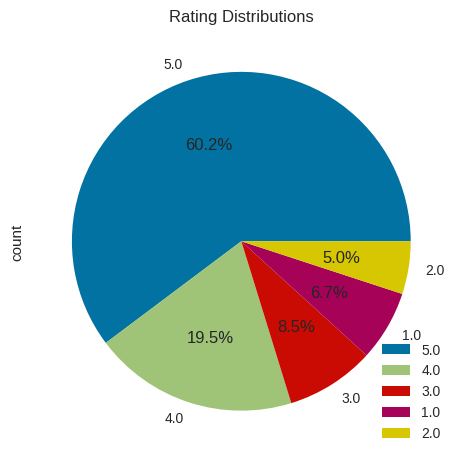

In [ ]:
book_rating1['Review_Rating'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Rating Distributions")
plt.legend()
plt.show()

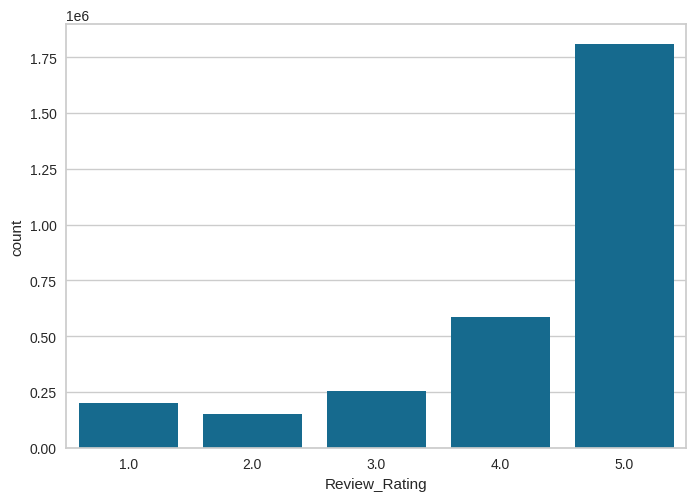

In [ ]:
sns.countplot(x=book_rating1['Review_Rating'])
plt.show()

In [ ]:
book_rating1.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
book_rating1

,Title,Review_Rating,Review_Summary,Review_Text
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...
2620605,The Idea of History,4.0,Difficult,"This is an extremely difficult book to digest,..."
2620606,The Idea of History,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2620607,The Idea of History,4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2620608,The Idea of History,5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


**Data Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from contractions import fix
from string import punctuation

# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load NLTK stopwords
stopwords_list = stopwords.words("english")

def clean_text(text):
    # Replace newline and tab characters with spaces
    text = text.replace("\\n", " ").replace("\t", " ")
    # Convert text to lowercase
    text = text.lower()
    # Convert accented characters to ASCII equivalents
    text = unidecode(text)
    # Expand contractions
    text = fix(text)
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove punctuation and stopwords, keep only words with more than 2 characters and alphabets
    words = [word for word in words if word not in punctuation and word not in stopwords_list and len(word) > 2 and word.isalpha()]
    return " ".join(words)

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word in the list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")

def spacy_lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc]
    return " ".join(lemmatized_text)

# Example usage
if __name__ == "__main__":
    sample_text = "This is an example sentence with various \t characters and punctuation. Let's clean it up!"
    cleaned_text = clean_text(sample_text)
    print("Cleaned Text:", cleaned_text)

    lemmatized_text = lemmatize_words(cleaned_text.split())
    print("Lemmatized Text (NLTK):", lemmatized_text)

    spacy_lemmatized_text = spacy_lemmatize_text(cleaned_text)
    print("Lemmatized Text (SpaCy):", spacy_lemmatized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Cleaned Text: example sentence various characters punctuation let clean
Lemmatized Text (NLTK): example sentence various character punctuation let clean
Lemmatized Text (SpaCy): example sentence various character punctuation let clean


In [ ]:
book_rating1.to_csv("/content/drive/MyDrive/Book_Review.csv",index=False)

In [ ]:
book_rating1 = book_rating1.sample(20000)
book_rating1

,Title,Review_Rating,Review_Summary,Review_Text
1900528,Fortune of War (Master and Commander Series),4.0,Another Strong Outing,This is the sixth volume in the Aubrey/Maturin...
2324030,The Old Patagonian Express: By Train Through t...,4.0,Take a trip,One of Theroux's best train trips. You can rea...
2374859,Golden Bough,4.0,Get it!,Sir James George Frazer (1854-1941) was a Scot...
1699113,U.S. Marine Guidebook of Essential Subjects,5.0,OOH-RAH!,"As a new recruit, I can't wait to be ahead of ..."
2434476,Superman Gen Thirteen,4.0,Great crossover,There have been thousands of crossovers in com...
...,...,...,...,...
873413,O Little Town of Maggody: An Arly Hanks Mystery,5.0,Another Maggody gem,Despite the small town of Maggody's inability ...
579080,Animal Farm & 1984 (Collected Stories of the W...,5.0,George Orwell double punch,"""Animal Farm""No animal may drink alcohol ""to e..."
106726,Persuasion (World's Classics),5.0,"Comedy, Drama and Romance: a near perfect bala...",Jane Austen's Persuasion stands shoulder to sh...
444245,Fateful Harvest: The True Story of a Small Tow...,5.0,A great read -- mindblowing true story,Don Delillo could not have imagined this. I wa...


In [ ]:
clean_train = book_rating1['Review_Text'].apply(clean_text)
clean_train = clean_train.apply(spacy_lemmatize_text)
clean_train

1900528    sixth volume series focusse war although less ...
2324030    one theroux good train trip really feel shift ...
2374859    sir james george frazer scottish anthropologis...
1699113    new recruit wait ahead other quot knowledge qu...
2434476    thousand crossover comic_strip superman partic...
                                 ...                        
873413     despite small town maggody inability pull soph...
579080     animal farm animal may drink alcohol excess fa...
106726     jane austen persuasion stand shoulder shoulder...
444245     delillo could imagine blow away harvest civil ...
352084     much love book louise bernikow capture unique ...
Name: Review_Text, Length: 20000, dtype: object

**Tfidf Vectorizer**

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(2, 5), max_df=0.95, min_df=2, max_features=10000)
tfidf_train = tfidf.fit_transform(clean_train)

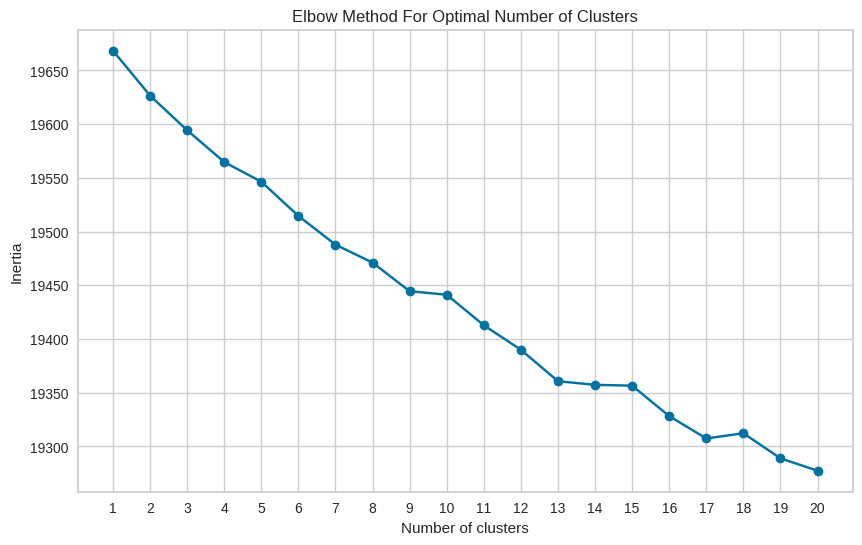

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming clean_train is your preprocessed text data
tfidf = TfidfVectorizer(ngram_range=(2, 5), max_df=0.95, min_df=2, max_features=10000)
tfidf_train = tfidf.fit_transform(clean_train)

inertia = []
K = range(1, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xticks(K)  # Setting the x-ticks to be the integers in K
plt.grid(True)  # Adding grid for better readability
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Initialize KMeans with the desired number of clusters
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the TF-IDF matrix
kmeans.fit(tfidf_train)

# Predict the cluster for each review
clusters = kmeans.predict(tfidf_train)

# Add the cluster assignments to the DataFrame
book_rating1['Cluster'] = clusters

In [ ]:
# Display the first few rows with cluster assignments
print(book_rating1[['Title', 'Review_Rating', 'Review_Summary', 'Review_Text', 'Cluster']].head())

# Display the number of reviews in each cluster
print(book_rating1['Cluster'].value_counts())

                                                     Title  Review_Rating  \
1900528       Fortune of War (Master and Commander Series)            4.0   
2324030  The Old Patagonian Express: By Train Through t...            4.0   
2374859                                       Golden Bough            4.0   
1699113        U.S. Marine Guidebook of Essential Subjects            5.0   
2434476                              Superman Gen Thirteen            4.0   

                Review_Summary  \
1900528  Another Strong Outing   
2324030            Take a trip   
2374859                Get it!   
1699113               OOH-RAH!   
2434476        Great crossover   

                                               Review_Text  Cluster  
1900528  This is the sixth volume in the Aubrey/Maturin...        0  
2324030  One of Theroux's best train trips. You can rea...        0  
2374859  Sir James George Frazer (1854-1941) was a Scot...        0  
1699113  As a new recruit, I can't wait to be ahead 

In [ ]:
import numpy as np

def get_top_terms_per_cluster(tfidf_matrix, kmeans_model, tfidf_vectorizer, n_terms=10):
    # Get the cluster centers (centroids)
    centroids = kmeans_model.cluster_centers_

    # Get the terms corresponding to the features
    terms = tfidf_vectorizer.get_feature_names_out()

    # Find the top terms for each cluster
    for i in range(centroids.shape[0]):
        print(f"Cluster {i}:")

        # Get the indices of the top terms
        top_indices = centroids[i].argsort()[-n_terms:][::-1]

        # Print the top terms
        top_terms = [terms[index] for index in top_indices]
        print(" ".join(top_terms))
        print()

# Call the function to display top terms
get_top_terms_per_cluster(tfidf_train, kmeans, tfidf, n_terms=10)

Cluster 0:
love book quot quot buy book must read book great year old enjoy book year ago book one easy read

Cluster 1:
book ever book ever read ever read good book ever good book good book ever read one good book ever one good book one good one good book ever read

Cluster 2:
read book book read year ago must read time read enjoy read first read read book year first read book enjoy read book

Cluster 3:
find book find book interesting book interesting find book helpful read book book helpful book useful buy book find book useful would recommend

Cluster 4:
well write favorite book one favorite one favorite book well write book write book story well write story well favorite book time extremely well

Cluster 5:
main character first book book series book read read book first book read first book series second book read first two main

Cluster 6:
recommend book highly recommend highly recommend book book anyone recommend book anyone would recommend book would recommend would recommend b

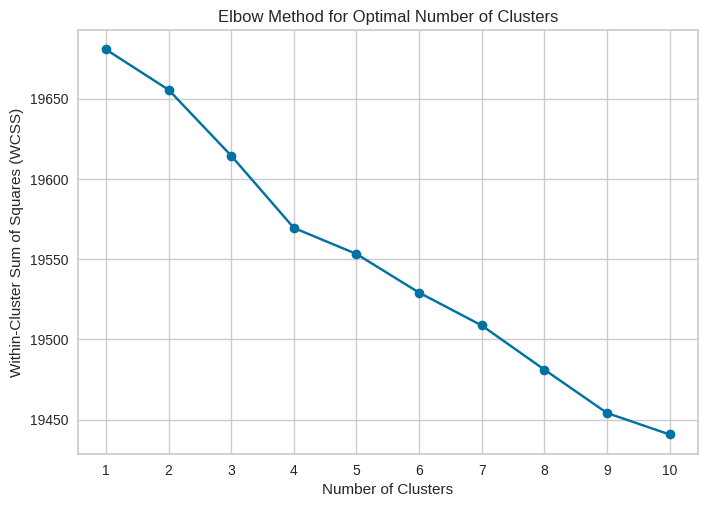

In [ ]:
import matplotlib.pyplot as plt

# Initialize a list to store the values of WCSS
wcss = []

# Define the range of clusters to try
k_values = range(1, 11)

# Fit KMeans models for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
"""from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans model
model = KMeans()

# Initialize the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 12))

# Fit the visualizer to the TF-IDF matrix
visualizer.fit(tfidf_train.A)  # Make sure to convert sparse matrix to dense array using .A attribute

# Visualize the elbow plot
visualizer.show()
plt.show()"""

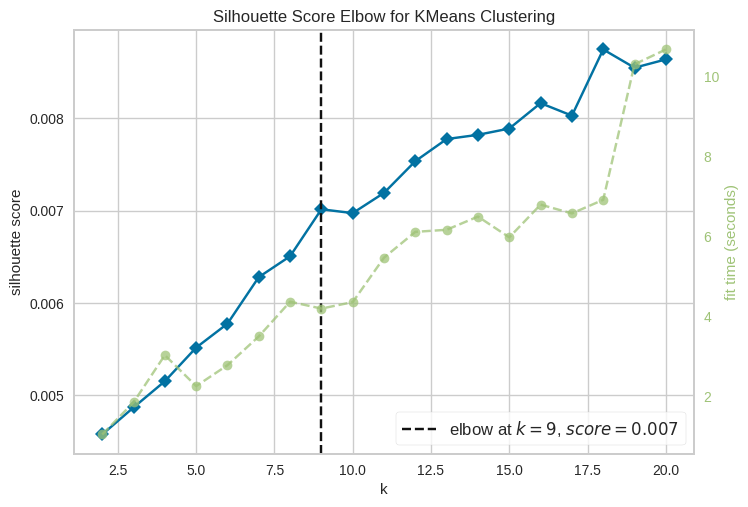

In [ ]:
# Assuming clean_train is your preprocessed text data
tfidf = TfidfVectorizer(ngram_range=(2, 5), max_df=0.95, min_df=2, max_features=10000)
tfidf_train = tfidf.fit_transform(clean_train)

# Initialize KMeans model
model = KMeans()

# Initialize the KElbowVisualizer with silhouette score metric and a range of clusters to try
visualizer = KElbowVisualizer(model, k=(2, 21), metric='silhouette')

# Fit the visualizer to the TF-IDF matrix
visualizer.fit(tfidf_train)

# Visualize the elbow plot
visualizer.show()
plt.show()

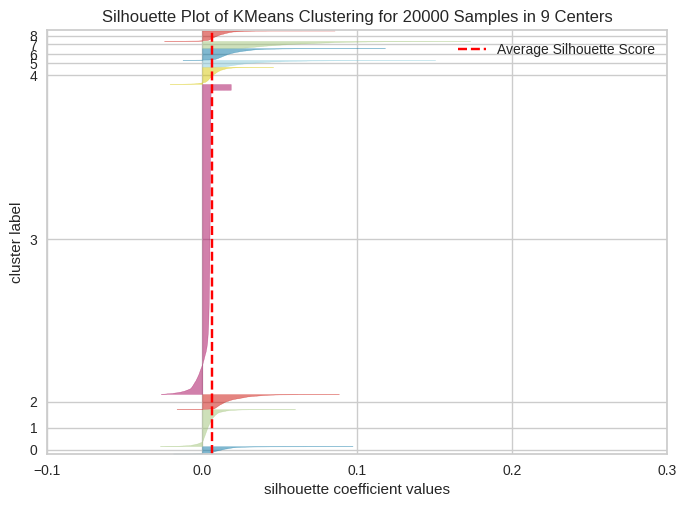

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=9)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(tfidf_train)
visualizer.show()
plt.show()

In [ ]:
# Calculate silhouette score for different values of k
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(tfidf_train)
    silhouette_avg = silhouette_score(tfidf_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
silhouette_scores

[0.004590913632763892,
 0.0048628891228176315,
 0.005302534618216142,
 0.005300101838305043,
 0.00559478712761138,
 0.0061522420216581835,
 0.006196790863133883,
 0.006960518185521767,
 0.006627137099005884,
 0.006871525438428602,
 0.007481237868081873,
 0.0079066606313108,
 0.007596859505549092]